## Observations and Insights

## Dependencies and starter code

In [139]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
full_set = pd.merge(mouse_metadata,study_results, how = 'inner', on = "Mouse ID")
col_names = ["Mouse_ID","Drug","Sex","Age","Weight","Timepoint","Tumor_Volume","Metastatic Sites"]
full_set.columns = col_names
full_set.head(5)

,Mouse_ID,Drug,Sex,Age,Weight,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Create group by object to aggregate drug data
gb = full_set.groupby("Drug")

# get mean, median, stdev, and sem for grouped object
tv_mean = gb.Tumor_Volume.mean()
tv_median = gb.Tumor_Volume.median()
tv_stdev = gb.Tumor_Volume.std()
tv_sem = gb.Tumor_Volume.sem()

# feed the summary data back into a dataframe
tv_summary = pd.DataFrame({"Mean":tv_mean,"Median":tv_median,"Standard Deviation":tv_stdev,"SEM":tv_sem})
tv_summary.head(20)

,Mean,Median,Standard Deviation,SEM
Drug,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar plots

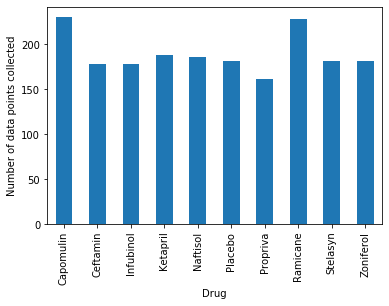

In [33]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_data = gb.Drug.count()
pdbar = bar_data.plot.bar()
pdbar.set_ylabel("Number of data points collected")
pdbar



<BarContainer object of 10 artists>

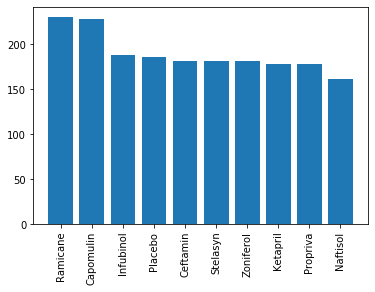

In [34]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#x_axis = [0,len(bar_data)]
drug_list = full_set["Drug"].unique()
drug_counts = full_set["Drug"].value_counts()
pyp_bar = plt.bar(drug_list,drug_counts)
plt.xticks(rotation=90)
pyp_bar

## Pie plots

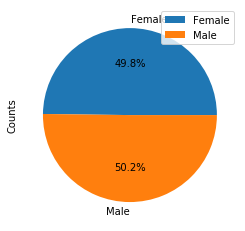

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

###########################################################################################################################
# I went pretty deliberately through the steps on this one, I was having all kinds of trouble because my original
# method was producing an incorrectly transposed dataframe, and all of my efforts to transpose it back to respectability
# were frustrated.  But hey, there's a pie plot using pandas.
###########################################################################################################################

# Create grouby object to get only unique mouse IDs, I assumed that the sex of each mouse was consistent over the dataset
# and was concerned that different numbers of datapoints for each mouse would skew the actual sex count
mouse_gb = full_set.groupby("Sex").Mouse_ID.unique()

# Take the length of the sex column for each unique mouse ID to count sex
female = int(len(mouse_gb["Female"]))
male = int(len(mouse_gb["Male"]))

#Throw that in a list, make some labels and create a pie chart
counts=[female,male]
labels=["Female","Male"]
pie_df = pd.DataFrame({"Counts":counts})
pie_df.plot.pie(y="Counts",labels=labels,autopct='%1.1f%%',rot=45)

([<matplotlib.patches.Wedge at 0x2a8ff9f6b48>,
 [Text(-1.0999781124353174, 0.0069391759767658615, 'Female'),
  Text(1.1999761226567098, -0.007570010156471995, 'Male')],
 [Text(-0.5999880613283548, 0.003785005078235924, '49.8%'),
  Text(0.6999860715497472, -0.004415839257941997, '50.2%')])

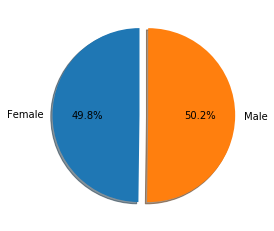

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

###########################################################################################################################
# Much the same approach as above, couldn't sort out how to get the object notation to disappear
###########################################################################################################################
mouse_gb = full_set.groupby("Sex").Mouse_ID.unique()
female = len(mouse_gb["Female"])
male = len(mouse_gb["Male"])
pie_data = [female,male]
labels=['Female','Male']
explode = [0,0.1]
plt.pie(pie_data,labels=labels,explode=explode,startangle=90,shadow=True,autopct='%1.1f%%')


## Quartiles, outliers and boxplots

,Mouse_ID,Drug,Sex,Age,Weight,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [84]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

#######################################################################################################################
# I feel like I took the long way around, but I couldn't hammer out anything else that was workable
# My basic approach was to first pare down the df to only the targeted treatment options, pop the individual mice out into
# a list, and then pull index values from that list to pass back into the treatment dataframe
#######################################################################################################################

# Create list of treatments to examine based on previously calculated mean tumor sizes
treatment_targets = ["Capomulin","Ramicane","Ceftamin","Ketapril"]

# Create dataframe based on said list
treatment_df = full_set[full_set["Drug"].isin(treatment_targets)]

# Create list object of mice to pull index values
just_mice = treatment_df["Mouse_ID"]
just_mice =list(just_mice)

# Set opening value for comparison, empty list of change index values
previous_mouse = 'k403'
change_index = []

# Loop through mouse list, where mouse value changes that index value is appended to index list
for mouse in just_mice:
    next_mouse=mouse
    if next_mouse!=previous_mouse:
        change_index.append(just_mice.index(previous_mouse))
    previous_mouse=mouse
change_index
    
# List cleanup, removing first index value and subtracting one from index values, I wasn't able to fix this in the loop
# and put this band-aid over it
change_index.pop(0)
change_index=[x-1 for x in change_index]

# Blank lists to hold values for final tumor size df
tumor_final = []
drug_regimen = []
mouse_name = []

# Apply index values from change index, append each to list
for i in change_index:
    tumor_final.append(treatment_df["Tumor_Volume"].iloc[i])
    drug_regimen.append(treatment_df["Drug"].iloc[i])
    mouse_name.append(treatment_df["Mouse_ID"].iloc[i])

# Recreating dataframe of final tumor sizes from change indexed lists
tumor_size_df = pd.DataFrame({"Mouse_ID":mouse_name,"Drug Regimen":drug_regimen,"Final Tumor Size":tumor_final})
tumor_size_df.head()

,Mouse_ID,Drug Regimen,Final Tumor Size
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472


<function matplotlib.pyplot.show(*args, **kw)>

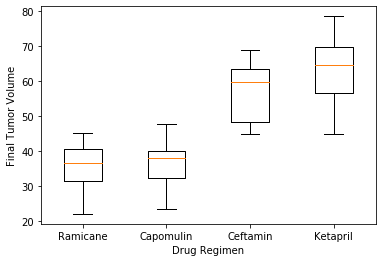

In [83]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

##############################################################################################################
# Same as above, I brute-forced each regmine into its own list for use in the box and whisker plot
##############################################################################################################

#Create lists of final tumor sizes for each drug regimen
ramicane = list(tumor_size_df["Final Tumor Size"].loc[tumor_size_df["Drug Regimen"]=='Ramicane'])
capomulin = list(tumor_size_df["Final Tumor Size"].loc[tumor_size_df["Drug Regimen"]=='Capomulin'])
ceftamin = list(tumor_size_df["Final Tumor Size"].loc[tumor_size_df["Drug Regimen"]=='Ceftamin'])
ketapril = list(tumor_size_df["Final Tumor Size"].loc[tumor_size_df["Drug Regimen"]=='Ketapril'])

# Sort those lists
ramicane.sort()
capomulin.sort()
ceftlamin.sort()
ketapril.sort()

# Create labels
labels = ['Ramicane','Capomulin','Ceftamin','Ketapril']

# Plug everything into and box plot
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot((ramicane,capomulin,ceftamin,ketapril),labels=labels)
plt.show


## Line and scatter plots

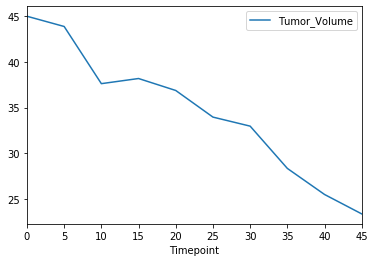

In [94]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

##########################################################################################################################
# For this section I hard-coded in the mouse ID, I started using rand to generate an appropriate mouse automatically 
# from a Capomulin df but just ran out of time to make that work
##########################################################################################################################

# Create dataframe from full data set with mouse ID
capomulin_df = full_set[["Timepoint","Tumor_Volume"]].loc[full_set["Mouse_ID"]=='s185']

# Set x and y values
x_values = capomulin_df["Timepoint"]
y_values = capomulin_df["Tumor_Volume"]

# Create line plot
capomulin_df.plot("Timepoint","Tumor_Volume")

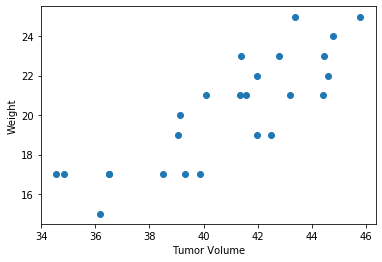

In [138]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Use loc to pull Capomulin
cap_df = full_set[["Mouse_ID","Weight","Tumor_Volume"]].loc[full_set["Drug"]=='Capomulin']

# create lists to pass to x and y values
mouse_vol_gb = list(cap_df.groupby("Mouse_ID").Tumor_Volume.mean())
mouse_weight_gb = list(cap_df.groupby("Mouse_ID").Weight.mean())

# add labels
plt.xlabel("Tumor Volume")
plt.ylabel("Weight")

# create scatter plot
plt.scatter(mouse_vol_gb,mouse_weight_gb)

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

###########################################################################################################################
# This is where I stalled out, will add this to my repo link on 04/05/2020 but did not want to submit the assignment late
###########################################################################################################################


In [ ]:
#############################################################################################################################
# Conclusions:
# Ramicane and Capomulin were both effective at reducing tumor size in mice, as demonstrated by the box plot
#
# Capomulin-treated mice had a correlation between tumor volume and mouse weight, which is not suprising. Bigger mice have 
# room for bigger tumors, and likely higher metabolisms
#
# Capomulin and Ramicane were the most heavily sampled drug regimens. This could be because they showed the most initial
# promise and were thus more heavily applied, or alternatively they could also be the drugs that the consumers of this
# analysis were most interested in (or at least the most interested in succeeding).
############################################################################################################################